In [27]:
import pandas as pd


# Load the energy consumption dataset
data = pd.read_csv("data/Duquesne_Light_hourly_filtered.csv")
print(type(data))
# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Convert 'Datetime' column to datetime and set it as the index
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)

# Rename the 'DUQ_MW' column 
data.rename(columns={'DUQ_MW': 'Energy_Consumption'}, inplace=True)

# Extract features from the index
data['Hour'] = data.index.hour
data['Day_of_Week'] = data.index.dayofweek
data['Month'] = data.index.month
data['Day'] = data.index.day  # Day of the month (1-31)

# Create 'Date' column
data['Date'] = data.index.date
# Ensure 'Date' is in ISO 8601 format
data['Date'] = data['Date'].apply(lambda x: x.isoformat() if not isinstance(x, str) else x)

# Create 'Season' column
data['Season'] = data['Month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else
              'Spring' if x in [3, 4, 5] else
              'Summer' if x in [6, 7, 8] else 'Fall'
)

# Map the seasons to numerical values
season_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4}
data['Season'] = data['Season'].map(season_mapping)

# Load the temperature dataset
temperature_data = pd.read_csv("data/filtered_temperature_Pittsburgh.csv")

# Convert 'Datetime' column to datetime
temperature_data['Datetime'] = pd.to_datetime(temperature_data['Datetime'])

# Convert temperature from Kelvin to Fahrenheit
# Formula: °F = (K - 273.15) * 9/5 + 32
temperature_data['Temperature_F'] = (temperature_data['Temperature_K'] - 273.15) * 9/5 + 32

# Drop the original Kelvin column if no longer needed
temperature_data.drop(columns=['Temperature_K'], inplace=True)

# Set 'Datetime' as the index for temperature data
temperature_data.set_index('Datetime', inplace=True)

# Merge temperature data with energy consumption data
data = data.merge(temperature_data, left_index=True, right_index=True, how='left')

# Feature Engineering: Temperature Deviation
data['Temp_Deviation'] = data['Temperature_F'] - data['Temperature_F'].mean()

# Verify the merged data
print(data[['Energy_Consumption', 'Temperature_F', 'Temp_Deviation', 'Hour', 'Day_of_Week', 'Month', 'Day', 'Season']].head())

# Save the updated dataset (optional)
data.to_csv("data/updated_energy_data_with_temperature.csv", index=True)
print(type(data))


<class 'pandas.core.frame.DataFrame'>
                     Energy_Consumption  Temperature_F  Temp_Deviation  Hour  \
Datetime                                                                       
2012-12-31 01:00:00              1556.0         29.840      -21.789178     1   
2012-12-31 02:00:00              1509.0         29.840      -21.789178     2   
2012-12-31 03:00:00              1479.0         29.282      -22.347178     3   
2012-12-31 04:00:00              1468.0         28.886      -22.743178     4   
2012-12-31 05:00:00              1488.0         28.868      -22.761178     5   

                     Day_of_Week  Month  Day  Season  
Datetime                                              
2012-12-31 01:00:00            0     12   31       1  
2012-12-31 02:00:00            0     12   31       1  
2012-12-31 03:00:00            0     12   31       1  
2012-12-31 04:00:00            0     12   31       1  
2012-12-31 05:00:00            0     12   31       1  
<class 'pandas.c

In [16]:
# Daily average energy consumption
mean_consumption = data['Energy_Consumption'].mean()
print(mean_consumption)

1624.7353850912466


In [17]:
# Display summary statistics for numerical columns
print(data.describe())

       Energy_Consumption          Hour   Day_of_Week         Month  \
count        45262.000000  45262.000000  45262.000000  45262.000000   
mean          1624.735385     11.500265      2.996620      6.650214   
std            296.393713      6.922339      2.000179      3.464899   
min           1014.000000      0.000000      0.000000      1.000000   
25%           1415.000000      6.000000      1.000000      4.000000   
50%           1588.000000     12.000000      3.000000      7.000000   
75%           1790.000000     17.750000      5.000000     10.000000   
max           2951.000000     23.000000      6.000000     12.000000   

                Day        Season  Temperature_F  Temp_Deviation  
count  45262.000000  45262.000000   45247.000000    4.524700e+04  
mean      15.721466      2.551058      51.629178    4.341743e-15  
std        8.796509      1.127825      18.816402    1.881640e+01  
min        1.000000      1.000000     -10.709200   -6.233838e+01  
25%        8.000000      

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Ensure 'Energy_Consumption' and 'Temperature_F' exist in the data
if 'Energy_Consumption' in data.columns and 'Temperature_F' in data.columns:
    if data['Energy_Consumption'].shape[0] > 0 and data['Temperature_F'].shape[0] > 0:
        # Initialize the scaler
        scaler = MinMaxScaler()

        # Scale the energy consumption and temperature columns
        data[['Energy_Consumption', 'Temperature_F']] = scaler.fit_transform(
            data[['Energy_Consumption', 'Temperature_F']]
        )
    else:
        print("Error: One of the columns is empty. Check your data processing.")
else:
    print("Error: Required columns ('Energy_Consumption' or 'Temperature_F') are missing.")

#Display the first few rows
print(data[['Energy_Consumption', 'Temperature_F']].head(50))

                     Energy_Consumption  Temperature_F
Datetime                                              
2012-12-31 01:00:00            0.279814       0.396138
2012-12-31 02:00:00            0.255550       0.396138
2012-12-31 03:00:00            0.240062       0.390687
2012-12-31 04:00:00            0.234383       0.386818
2012-12-31 05:00:00            0.244708       0.386643
2012-12-31 06:00:00            0.273103       0.364574
2012-12-31 07:00:00            0.322148       0.342505
2012-12-31 08:00:00            0.364481       0.342505
2012-12-31 09:00:00            0.370676       0.375740
2012-12-31 10:00:00            0.388745       0.364134
2012-12-31 11:00:00            0.395457       0.362200
2012-12-31 12:00:00            0.391327       0.359386
2012-12-31 13:00:00            0.378936       0.357276
2012-12-31 14:00:00            0.381518       0.364134
2012-12-31 15:00:00            0.382550       0.368354
2012-12-31 16:00:00            0.384615       0.374333
2012-12-31

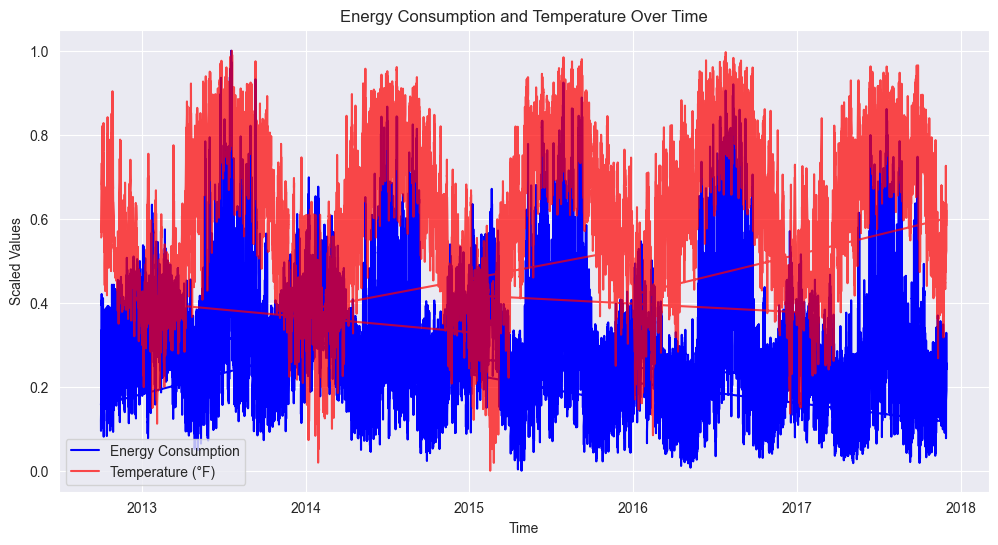

In [19]:
import matplotlib.pyplot as plt

# Plot Energy Consumption and Temperature over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Energy_Consumption'], label='Energy Consumption', color='b')
plt.plot(data.index, data['Temperature_F'], label='Temperature (°F)', color='r', alpha=0.7)
plt.title('Energy Consumption and Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Scaled Values')
plt.legend()
plt.show()




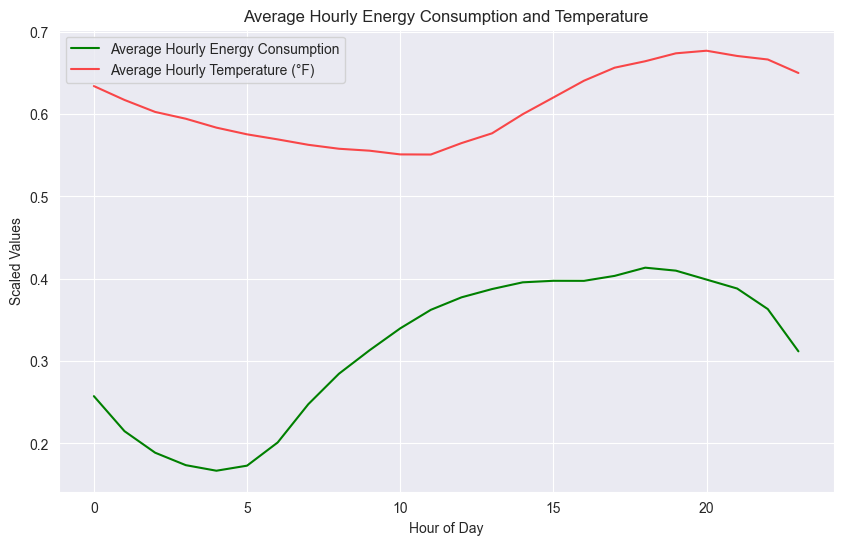

In [20]:
# Group by Hour and calculate mean energy consumption and mean temperature
hourly_data = data.groupby('Hour')['Energy_Consumption'].mean()
hourly_temperature = data.groupby('Hour')['Temperature_F'].mean()

# Plot the hourly energy consumption and temperature pattern
plt.figure(figsize=(10, 6))
plt.plot(hourly_data, label='Average Hourly Energy Consumption', color='g')
plt.plot(hourly_temperature, label='Average Hourly Temperature (°F)', color='r', alpha=0.7)
plt.title('Average Hourly Energy Consumption and Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Scaled Values')
plt.legend()
plt.show()



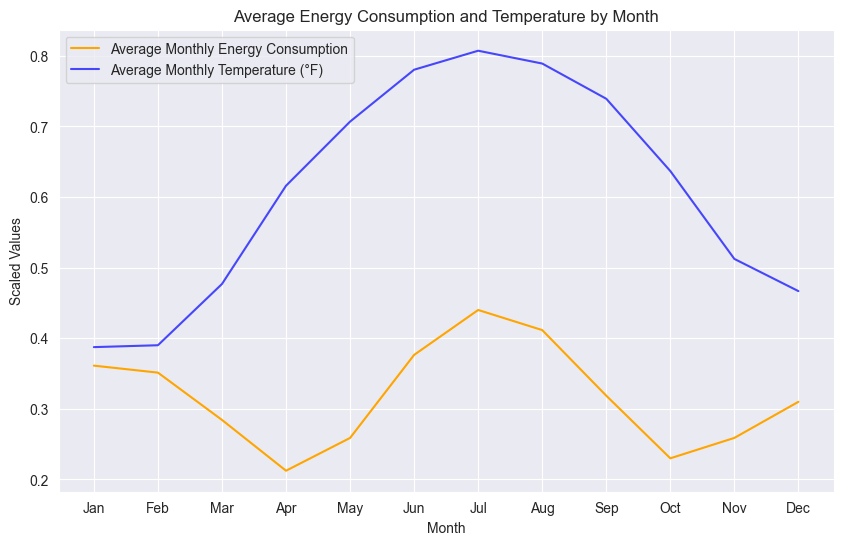

In [21]:
# Group by Month and calculate mean energy consumption and mean temperature
monthly_data = data.groupby('Month')['Energy_Consumption'].mean()
monthly_temperature = data.groupby('Month')['Temperature_F'].mean()

# Plot the monthly energy consumption and temperature pattern
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, label='Average Monthly Energy Consumption', color='orange')
plt.plot(monthly_temperature, label='Average Monthly Temperature (°F)', color='b', alpha=0.7)
plt.title('Average Energy Consumption and Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Scaled Values')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()


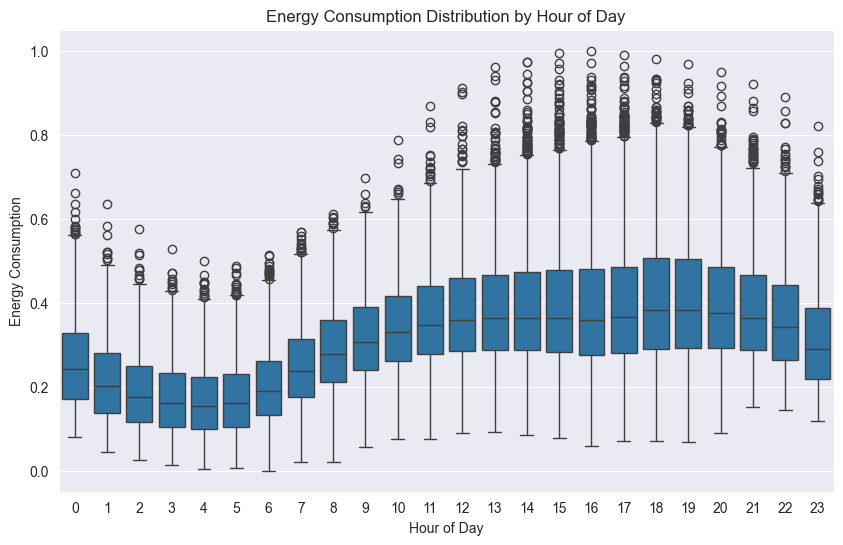

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# Boxplot for Energy Consumption by Hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='Hour', y='Energy_Consumption', data=data)
plt.title('Energy Consumption Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumption')
plt.show()



In [23]:
# Unscale the 'Energy_Consumption' and 'Temperature_F' columns using the same scaler
data[['Energy_Consumption', 'Temperature_F']] = scaler.inverse_transform(data[['Energy_Consumption', 'Temperature_F']])



In [24]:
import sqlite3

# Connect to SQLite database 
conn = sqlite3.connect('energy_consumption.db')  # Name of the database
cursor = conn.cursor()

# Drop the existing table if it exists
cursor.execute('DROP TABLE IF EXISTS energy_consumption')

# Create a table (if it doesn't exist) based on DataFrame columns, including temperature
cursor.execute('''
CREATE TABLE IF NOT EXISTS energy_consumption (
    Date TEXT,
    Energy_Consumption REAL,
    Hour INTEGER,
    Day_of_Week INTEGER,
    Month INTEGER,
    Day INTEGER,
    Season INTEGER,
    Temperature_F REAL
)
''')

# Convert DataFrame to a list of tuples (rows of data)
data_tuples = [tuple(x) for x in data[['Date', 'Energy_Consumption', 'Hour', 'Day_of_Week', 'Month', 'Day', 'Season', 'Temperature_F']].values]

# Insert data into the table
cursor.executemany('''
INSERT INTO energy_consumption (Date, Energy_Consumption, Hour, Day_of_Week, Month, Day, Season, Temperature_F)
VALUES (?, ?, ?, ?, ?, ?, ?, ?)
''', data_tuples)

# Commit the transaction and close the connection
conn.commit()
conn.close()

print("Data inserted successfully.")


Data inserted successfully.


In [25]:
# Reconnect to the database to verify
conn = sqlite3.connect('energy_consumption.db')
cursor = conn.cursor()

# Fetch all data from the table to verify
cursor.execute('SELECT * FROM energy_consumption LIMIT 5')
print(cursor.fetchall())  # Show the first 5 rows of the table

# Close connection
conn.close()


[('2012-12-31', 1556.0, 1, 0, 12, 31, 1, 29.84000000000002), ('2012-12-31', 1509.0, 2, 0, 12, 31, 1, 29.84000000000002), ('2012-12-31', 1479.0, 3, 0, 12, 31, 1, 29.282000000000018), ('2012-12-31', 1468.0, 4, 0, 12, 31, 1, 28.88600000000007), ('2012-12-31', 1488.0, 5, 0, 12, 31, 1, 28.868000000000084)]


Epoch 1/30 - Loss: 59865.7573
Epoch 2/30 - Loss: 18792.8314
Epoch 3/30 - Loss: 16230.7376
Epoch 4/30 - Loss: 14426.9523
Epoch 5/30 - Loss: 13651.1801
Epoch 6/30 - Loss: 13376.6381
Epoch 7/30 - Loss: 13033.2199
Epoch 8/30 - Loss: 12842.7556
Epoch 9/30 - Loss: 12955.3262
Epoch 10/30 - Loss: 12449.1425
Epoch 11/30 - Loss: 11695.2790
Epoch 12/30 - Loss: 11668.1928
Epoch 13/30 - Loss: 11661.6438
Epoch 14/30 - Loss: 11653.3800
Epoch 15/30 - Loss: 11612.1550
Epoch 16/30 - Loss: 11583.4589
Epoch 17/30 - Loss: 11587.1973
Epoch 18/30 - Loss: 11604.8709
Epoch 19/30 - Loss: 11565.2480
Epoch 20/30 - Loss: 11540.0022
Epoch 21/30 - Loss: 11419.3284
Epoch 22/30 - Loss: 11415.5042
Epoch 23/30 - Loss: 11415.9723
Epoch 24/30 - Loss: 11408.7722
Epoch 25/30 - Loss: 11411.4200
Epoch 26/30 - Loss: 11407.2510
Epoch 27/30 - Loss: 11407.3225
Epoch 28/30 - Loss: 11401.7052
Epoch 29/30 - Loss: 11403.5205
Epoch 30/30 - Loss: 11403.2125
Epoch 31/30 - Loss: 11390.8346
Epoch 32/30 - Loss: 11387.2337
Epoch 33/30 - Los

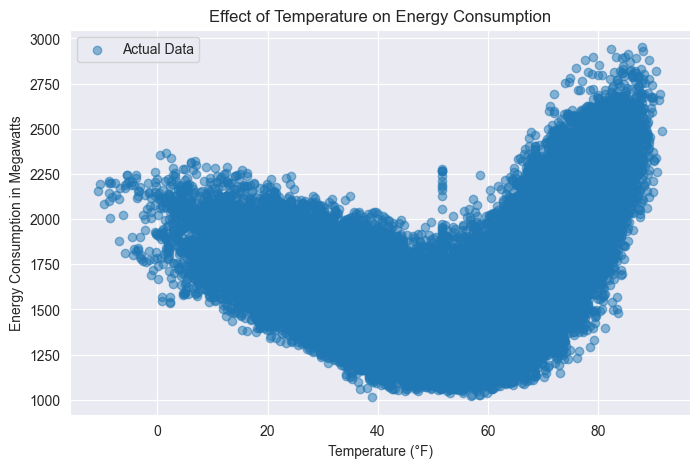


Sample Predictions vs. Actual Energy Consumption:
      Actual Energy  Predicted Energy  Temperature (°F)
0            1604.0       1617.122559            45.824
1            1667.0       1818.920288             5.450
2            1586.0       1534.134521            64.148
3            1866.0       1943.853271             5.090
4            1302.0       1177.677002            45.629
...             ...               ...               ...
9040         1833.0       1963.483521             9.464
9041         1845.0       1867.471558            68.756
9042         1389.0       1425.014282            71.366
9043         1191.0       1209.761719            45.392
9044         1517.0       1373.194702            27.158

[9045 rows x 3 columns]


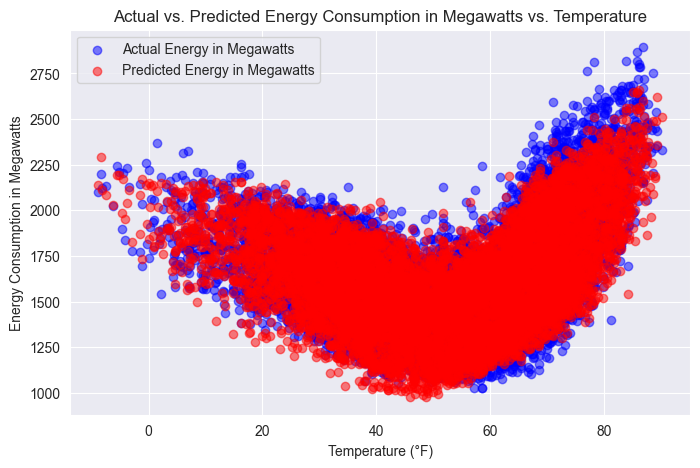

interactive(children=(FloatSlider(value=50.0, description='Temperature (°F):', step=0.5), IntSlider(value=1, d…

In [26]:
import numpy as np
import os
import sqlite3
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ipywidgets as widgets
from ipywidgets import interactive

# ------------------------------------------------------------------------------
# Data Loading and Preprocessing
# ------------------------------------------------------------------------------

# Connect to the database
conn = sqlite3.connect('energy_consumption.db')
cursor = conn.cursor()

# Fetch the correct columns
cursor.execute('SELECT Date, Energy_Consumption, Hour, Day_of_Week, Month, Day, Season, Temperature_F FROM energy_consumption')
data = cursor.fetchall()
columns = ['Date', 'Energy_Consumption', 'Hour', 'Day_of_Week', 'Month', 'Day', 'Season', 'Temperature_F']

# Convert to DataFrame
df = pd.DataFrame(data, columns=columns)
conn.close()

# Handle missing values
df = df.dropna()

# Feature engineering
#Fourier Transforms for month
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Interaction Term: Temperature_F * Hour
df['Temp_Hour_Interaction'] = df['Temperature_F'] * df['Hour']

# Fourier Transforms for Hour
df['hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

# Seasonal Feature 
df['Season_numerical'] = df['Season'].map({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4})

# Rolling Average of Energy Consumption (24-hour window)
df['Energy_Consumption_rolling_avg'] = df['Energy_Consumption'].rolling(window=24).mean()

# Drop rows with NaN in the rolling average column only
df = df.dropna(subset=['Energy_Consumption_rolling_avg'])

# Normalize data
scaler = MinMaxScaler()
scaler.fit(df[['Temperature_F', 'month_sin', 'month_cos', 'Temp_Hour_Interaction', 'hour_sin', 'hour_cos', 'Energy_Consumption_rolling_avg']])

# Select features and target
features = df[['Temperature_F', 'month_sin', 'month_cos', 'Temp_Hour_Interaction', 'hour_sin', 'hour_cos', 'Energy_Consumption_rolling_avg']].values
target = df['Energy_Consumption'].values


#  Perform train-test split before converting to PyTorch tensors
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Create DataLoader for training
dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# ------------------------------------------------------------------------------
# Define the Neural Network Model
# ------------------------------------------------------------------------------

# Define the Neural Network 
class EnergyPredictionNN(nn.Module):
    def __init__(self):
        super(EnergyPredictionNN, self).__init__()
        self.fc1 = nn.Linear(7, 64)  # 7 features now: Temperature_F, month_sin, month_cos, Temp_Hour_Interaction, hour_sin, hour_cos, Energy_Consumption_rolling_avg
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
model = EnergyPredictionNN()

# File path for saving the model
model_file = "model.pth"

# ------------------------------------------------------------------------------
# Load or Train the Model
# ------------------------------------------------------------------------------

FORCE_TRAIN = True  # Set to True to retrain even if a saved model exists
# Load saved model
if os.path.exists(model_file) and not FORCE_TRAIN:
    model.load_state_dict(torch.load(model_file, weights_only=True))
    model.eval()
    print("Model loaded successfully from", model_file)
else:
    # Set up optimizer and learning rate scheduler
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    
    # Training loop
    for epoch in range(40):
        model.train()
        total_loss = 0
        for features_batch, target_batch in train_loader:
            optimizer.zero_grad()
            predictions = model(features_batch)
            loss = nn.MSELoss()(predictions, target_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        scheduler.step()
        print(f"Epoch {epoch+1}/30 - Loss: {total_loss / len(train_loader):.4f}")
    
    # Save the trained model
    torch.save(model.state_dict(), model_file)
    print("Model trained and saved successfully to", model_file)

# ------------------------------------------------------------------------------
# Evaluation on Test Data
# ------------------------------------------------------------------------------

# Convert test data to PyTorch tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Generate predictions for the test set
model.eval()  # Ensure evaluation mode
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)

y_pred = y_pred_tensor.numpy().flatten()

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

print("\nModel Performance Summary:")
print(f"The model explains {r2 * 100:.2f}% of the variation in energy consumption.")
print(f"On average, predictions are off by {mae:.4f} units of energy consumption.")
print(f"The model's RMSE is {rmse:.4f}, meaning most errors are within this range.")

# ------------------------------------------------------------------------------
# Create a Scatter Plot of Prediction vs Actual Energy Consumption
# ------------------------------------------------------------------------------

import matplotlib.pyplot as plt

# Scatter plot to show relationship
plt.figure(figsize=(8, 5))
plt.scatter(df['Temperature_F'], df['Energy_Consumption'], alpha=0.5, label="Actual Data")
plt.xlabel("Temperature (°F)")
plt.ylabel("Energy Consumption in Megawatts")
plt.title("Effect of Temperature on Energy Consumption")
plt.legend()
plt.show()

# Convert y_pred to 1D array
y_pred = y_pred.flatten()

# Ensure everything has the same length
num_samples = min(len(y_test), len(y_pred), X_test.shape[0])

comparison_df = pd.DataFrame({
    'Actual Energy': y_test[:num_samples], 
    'Predicted Energy': y_pred[:num_samples], 
    'Temperature (°F)': X_test[:num_samples, 0]  
})

print("\nSample Predictions vs. Actual Energy Consumption:")
print(comparison_df)

# Scatter plot comparing actual vs. predicted energy consumption
plt.figure(figsize=(8, 5))

# Plot actual data
plt.scatter(comparison_df['Temperature (°F)'], comparison_df['Actual Energy'], 
            alpha=0.5, label="Actual Energy in Megawatts", color='blue')

# Plot predicted data
plt.scatter(comparison_df['Temperature (°F)'], comparison_df['Predicted Energy'], 
            alpha=0.5, label="Predicted Energy in Megawatts", color='red')

plt.xlabel("Temperature (°F)")
plt.ylabel("Energy Consumption in Megawatts")
plt.title("Actual vs. Predicted Energy Consumption in Megawatts vs. Temperature")
plt.legend()
plt.show()

# ------------------------------------------------------------------------------
# Define the Energy Prediction Function
# ------------------------------------------------------------------------------

def predict_energy(temperature_F, month, hour, rolling_avg):
   
    # Compute Fourier features and interaction term
    month_sin = np.sin(2 * np.pi * month / 12)
    month_cos = np.cos(2 * np.pi * month / 12)
    temp_hour_interaction = temperature_F * hour
    hour_sin = np.sin(2 * np.pi * hour / 24)
    hour_cos = np.cos(2 * np.pi * hour / 24)
    
    # Combine features into a NumPy array 
    input_features = np.array([
        temperature_F, 
        month_sin, 
        month_cos, 
        temp_hour_interaction, 
        hour_sin, 
        hour_cos, 
        rolling_avg
    ], dtype=np.float32)
    
    # Convert features to a tensor and add batch dimension
    input_tensor = torch.tensor(input_features).unsqueeze(0)
    
    # Predict energy consumption
    with torch.no_grad():
        prediction = model(input_tensor)
    
    # Return the prediction as a scalar value
    return prediction.item()

# ------------------------------------------------------------------------------
# Create an Interactive Widget for Temperature, Month, and Hour Input
# ------------------------------------------------------------------------------

def interactive_prediction(temperature_F, month, hour):
   
    # Compute a default rolling average from the dataset 
    default_rolling_avg = df['Energy_Consumption_rolling_avg'].mean()
    
    # Get the predicted energy consumption
    predicted_value = predict_energy(temperature_F, month, hour, default_rolling_avg)
    print(f"Predicted Energy Consumption:\n"
          f"  Temperature: {temperature_F}°F\n"
          f"  Month: {month}\n"
          f"  Hour: {hour}\n"
          f"  (Rolling Avg: {default_rolling_avg:.2f})\n"
          f"→ {predicted_value:.4f} (in megawatts)")

# Create interactive widgets for temperature, month, and hour
temp_slider = widgets.FloatSlider(min=0, max=100, step=0.5, value=50, description='Temperature (°F):')
month_slider = widgets.IntSlider(min=1, max=12, step=1, value=1, description='Month:')
hour_slider = widgets.IntSlider(min=0, max=23, step=1, value=12, description='Hour:')

# Link the interactive function to the widgets
interactive(interactive_prediction, temperature_F=temp_slider, month=month_slider, hour=hour_slider)

